In [1]:
#importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

!pip install kaggle
import json
import os
import zipfile

# 🧹 **Data Cleaning and Preparation**

In [4]:
#creating environment for my credentials for Kaggle API
cred_path = '/content/kaggle.json'
with open(cred_path, 'r') as f:
    creds = json.load(f)
os.environ['KAGGLE_USERNAME'] = creds['username']
os.environ['KAGGLE_KEY'] = creds['key']

!kaggle datasets download -d skihikingkevin/csgo-matchmaking-damage

#unzipping dataset download
zip_file_path = '/content/csgo-matchmaking-damage.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/csgo_data')
print("Files in /content/csgo_data:", os.listdir("/content/csgo_data"))

Dataset URL: https://www.kaggle.com/datasets/skihikingkevin/csgo-matchmaking-damage
License(s): CC-BY-NC-SA-4.0
 96% 579M/602M [00:01<00:00, 204MB/s]
100% 602M/602M [00:01<00:00, 318MB/s]
Files in /content/csgo_data: ['de_nuke.png', 'de_overpass.png', 'de_santorini.png', 'de_coast.png', 'esea_master_kills_demos.part2.csv', 'de_empire.png', 'esea_master_dmg_demos.part2.csv', 'de_cache.png', 'de_mirage.png', 'cs_cruise.png', 'esea_master_kills_demos.part1.csv', 'de_mikla.png', 'esea_master_grenades_demos.part1.csv', 'mm_grenades_demos.csv', 'esea_master_grenades_demos.part2.csv', 'de_inferno.png', 'map_data.csv', 'de_royal.png', 'de_tulip.png', 'esea_meta_demos.part1.csv', 'de_train.png', 'de_cbble.png', 'de_dust2.png', 'de_new_nuke.png', 'esea_master_dmg_demos.part1.csv', 'de_season.png', 'esea_meta_demos.part2.csv', 'mm_master_demos.csv']


In [ ]:
#creating dataframes from dataset
meta_df = pd.concat([
    pd.read_csv('/content/csgo_data/esea_meta_demos.part1.csv'),
    pd.read_csv('/content/csgo_data/esea_meta_demos.part2.csv')
], ignore_index=True)

kill_df = pd.concat([
    pd.read_csv('/content/csgo_data/esea_master_kills_demos.part1.csv'),
    pd.read_csv('/content/csgo_data/esea_master_kills_demos.part2.csv')
], ignore_index=True)

dmg_df = pd.concat([
    pd.read_csv('/content/csgo_data/esea_master_dmg_demos.part1.csv'),
    pd.read_csv('/content/csgo_data/esea_master_dmg_demos.part2.csv')
], ignore_index=True)

pd.set_option("display.max_columns", None)

In [ ]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377629 entries, 0 to 377628
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   file           377629 non-null  object 
 1   map            377629 non-null  object 
 2   round          377629 non-null  int64  
 3   start_seconds  377589 non-null  float64
 4   end_seconds    377589 non-null  float64
 5   winner_team    377628 non-null  object 
 6   winner_side    377628 non-null  object 
 7   round_type     377629 non-null  object 
 8   ct_eq_val      377629 non-null  int64  
 9   t_eq_val       377629 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 28.8+ MB


In [ ]:
kill_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2742646 entries, 0 to 2742645
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   file             object 
 1   round            int64  
 2   tick             int64  
 3   seconds          float64
 4   att_team         object 
 5   vic_team         object 
 6   att_side         object 
 7   vic_side         object 
 8   wp               object 
 9   wp_type          object 
 10  ct_alive         int64  
 11  t_alive          int64  
 12  is_bomb_planted  bool   
dtypes: bool(1), float64(1), int64(4), object(7)
memory usage: 253.7+ MB


In [ ]:
#merging round meta data with kill and damage data
df = kill_df.merge(meta_df, on=["file", "round"], how="left")
df = df.merge(dmg_df, on=["file", "round", "tick"], how="left")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2841906 entries, 0 to 2841905
Data columns (total 41 columns):
 #   Column             Dtype  
---  ------             -----  
 0   file               object 
 1   round              int64  
 2   tick               int64  
 3   seconds_x          float64
 4   att_team_x         object 
 5   vic_team_x         object 
 6   att_side_x         object 
 7   vic_side_x         object 
 8   wp_x               object 
 9   wp_type_x          object 
 10  ct_alive           int64  
 11  t_alive            int64  
 12  is_bomb_planted_x  bool   
 13  map                object 
 14  start_seconds      float64
 15  end_seconds        float64
 16  winner_team        object 
 17  winner_side        object 
 18  round_type         object 
 19  ct_eq_val          float64
 20  t_eq_val           float64
 21  seconds_y          float64
 22  att_team_y         object 
 23  vic_team_y         object 
 24  att_side_y         object 
 25  vic_side_y        

In [ ]:
#removing duplicate columns and renaming existing columns for better clarity
df = df.drop(columns=['att_rank', 'vic_rank', 'att_team_y', 'vic_team_y', 'att_side_y', 'vic_side_y', 'is_bomb_planted_y', 'wp_y', 'wp_type_y'])

df = df.rename(columns={
    "file": "game_filename",
    "seconds_x": "round_seconds",
    "seconds_y": "game_seconds",
    "att_team_x": "attacker_team",
    "vic_team_x": "victim_team",
    "att_side_x": "attacker_side",
    "vic_side_x": "victim_side",
    "wp": "weapon",
    "wp_type_x" : "wp_type",
    "is_bomb_planted_x": "bomb_planted",
    "arm_dmg" : "armor_damage"
})

#reordering df columns for better clarity and logic
new_order = [
    #game and round identifiers
    "game_filename", "map", "round", "tick", "round_seconds", "game_seconds",

    #team and side identifiers
    "attacker_team", "victim_team", "attacker_side", "victim_side",

    #weapon and event identifiers
    "wp_x", "wp_type", "bomb_planted", "bomb_site", "hitbox",

    #round stats
    "ct_alive", "t_alive", "ct_eq_val", "t_eq_val", "winner_team", "winner_side", "round_type",

    #player identifiers
    "att_id", "vic_id",

    #health and damage stats
    "hp_dmg", "armor_damage",

    #timing within the round
    "start_seconds", "end_seconds",

    #player event positions
    "att_pos_x", "att_pos_y", "vic_pos_x", "vic_pos_y"
]

df = df[new_order]
df.head()

,game_filename,map,round,tick,round_seconds,game_seconds,attacker_team,victim_team,attacker_side,victim_side,wp_x,wp_type,bomb_planted,bomb_site,hitbox,ct_alive,t_alive,ct_eq_val,t_eq_val,winner_team,winner_side,round_type,att_id,vic_id,hp_dmg,armor_damage,start_seconds,end_seconds,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y
0,esea_match_13770997.dem,de_overpass,1,16058,30.74165,125.0495,Animal Style,Hentai Hooligans,CounterTerrorist,Terrorist,USP,Pistol,False,NaN,Head,5,4,4300.0,4250.0,Hentai Hooligans,Terrorist,PISTOL_ROUND,7.656120e+16,7.656120e+16,100.0,0.0,94.30782,160.9591,-1066.8740,3.44563,-614.1868,-91.70777
1,esea_match_13770997.dem,de_overpass,1,16210,31.93185,126.2397,Hentai Hooligans,Animal Style,Terrorist,CounterTerrorist,Glock,Pistol,False,NaN,Head,4,4,4300.0,4250.0,Hentai Hooligans,Terrorist,PISTOL_ROUND,7.656120e+16,7.656120e+16,6.0,0.0,94.30782,160.9591,-751.6216,-55.69779,-1499.8930,61.62376
2,esea_match_13770997.dem,de_overpass,1,16510,34.28094,128.5888,Hentai Hooligans,Animal Style,Terrorist,CounterTerrorist,Glock,Pistol,False,NaN,Head,3,4,4300.0,4250.0,Hentai Hooligans,Terrorist,PISTOL_ROUND,7.656120e+16,7.656120e+16,87.0,0.0,94.30782,160.9591,-1025.8290,-487.79010,-1051.8220,98.66519
3,esea_match_13770997.dem,de_overpass,1,17104,38.93212,133.2399,Animal Style,Hentai Hooligans,CounterTerrorist,Terrorist,USP,Pistol,False,NaN,Head,3,3,4300.0,4250.0,Hentai Hooligans,Terrorist,PISTOL_ROUND,7.656120e+16,7.656120e+16,41.0,0.0,94.30782,160.9591,-1882.5430,506.90220,-782.7830,176.01590
4,esea_match_13770997.dem,de_overpass,1,17338,40.76441,135.0722,Hentai Hooligans,Animal Style,Terrorist,CounterTerrorist,Glock,Pistol,False,NaN,Head,2,3,4300.0,4250.0,Hentai Hooligans,Terrorist,PISTOL_ROUND,7.656120e+16,7.656120e+16,8.0,0.0,94.30782,160.9591,-1104.0010,-127.94100,-1888.1070,-367.58030


# 📊 **Data Analysis and Visualization**

In [ ]:
#retrieving map data to create heatmaps for attacker positions
map_data = pd.read_csv("/content/csgo_data/map_data.csv")
map_data.columns = ['map', 'x_end', 'y_end', 'res_x', 'res_y', 'x_start', 'y_start']
map_data = map_data[['map', 'x_start', 'y_start', 'x_end', 'y_end', 'res_x', 'res_y']]

map_data

,map,x_start,y_start,x_end,y_end,res_x,res_y
0,de_cache,-2031,-2240,3752,3187,1024,1024
1,de_cbble,-3819,-3073,2282,3032,1024,1024
2,de_dust2,-2486,-1150,2127,3455,1024,1024
3,de_inferno,-1960,-1062,2797,3800,1024,1024
4,de_mirage,-3217,-3401,1912,1682,1024,1024
5,de_overpass,-4820,-3591,503,1740,1024,1024
6,de_train,-2436,-2469,2262,2447,1024,1024


In [ ]:
#creating new columns in existing dataframe to store converted coordinates
df['map_x'] = 0.0
df['map_y'] = 0.0

#creating a loop for vectorized conversion of coordinates by map to fit radar image resolution
for index, row in map_data.iterrows():
    m = row['map']
    mask = df['map'] == m  #filter for coordinate conversion by map name
    x_start, x_end, res_x = row['x_start'], row['x_end'], row['res_x']
    y_start, y_end, res_y = row['y_start'], row['y_end'], row['res_y']
    size_x = x_end - x_start
    size_y = y_end - y_start

    df.loc[mask, 'map_x'] = ((df.loc[mask, 'att_pos_x'] - x_start) / size_x) * res_x
    df.loc[mask, 'map_y'] = res_y - ((df.loc[mask, 'att_pos_y'] - y_start) / size_y) * res_y

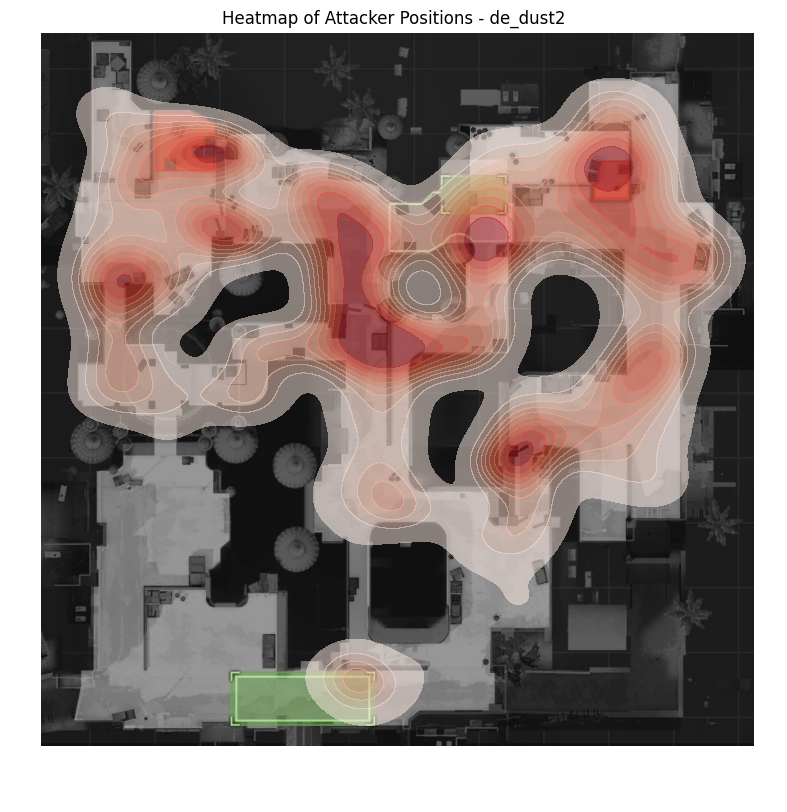

In [ ]:
import matplotlib.image as mpimg

def plot_heatmap_for_map(df, map_name):
    #filtering for map and retrieving coordinates for each kill made by the winning team
    df_map = df[(df['map'] == map_name) & (df['attacker_side'] == df['winner_side'])]

    row = map_data[map_data['map'] == map_name].iloc[0]
    res_x, res_y = row['res_x'], row['res_y']

    #retrieving radar image from dataset
    radar_path = f"/content/csgo_data/{map_name}.png"
    radar_img = mpimg.imread(radar_path)

    #creating KDE heatmap to show concrentration of kills by map
    plt.figure(figsize=(10, 10))
    plt.imshow(radar_img, extent=[0, res_x, res_y, 0])  #aligning image with pixel space
    sns.kdeplot(
        x=df_map['map_x'], y=df_map['map_y'],
        fill=True, cmap='Reds', alpha=0.5
    )
    plt.title(f"Heatmap of Attacker Positions - {map_name}")
    plt.axis('off')
    plt.show()

plot_heatmap_for_map(df, 'de_dust2')    #selecting map 'de_dust2'

The heatmaps reveal that kills are concentrated in key choke points and high-traffic areas on each map. These locations align with spots where experienced players often position themselves to gain strategic advantages, such as holding angles, controlling bombsites, or contesting mid-map control. The clustering of kills in these zones highlights how map knowledge and positioning directly influence win outcomes—players who consistently secure strong positions are more likely to convert rounds into victories.

In [ ]:
#calculating the probability of winning via first round kill
p_win = (df['winner_side'] == df['attacker_side']).mean()
first_kill_rounds = df[df['round_seconds'] == df.groupby('round')['round_seconds'].transform('min')]     #filtering for the first kills only
p_win_firstkill = (first_kill_rounds['winner_side'] == first_kill_rounds['attacker_side']).mean()

impact = p_win_firstkill - p_win
print(f"Getting first kill increases win chance by {impact:.2%}")

Getting first kill increases win chance by -0.90%


In [ ]:
# Probability of winning given bomb was planted
bomb_planted_rounds = df[df['bomb_planted'] == True]
p_win_bomb = (bomb_planted_rounds['winner_team'] == bomb_planted_rounds['attacker_team']).mean()

print(f"Winning probability with bomb planted: {p_win_bomb:.2%}")

Winning probability with bomb planted: 67.77%


*   Getting the first kill has a negligible effect on winning, actually showing a slight decrease of **0.9%**, suggesting that early kills alone do not strongly determine the round outcome in this dataset.
*   When the bomb is planted, the attacking side wins about **68%** of the time, showing that successfully planting the bomb significantly increases their chances of winning the round.

**Takeaway: Bomb control is a much stronger factor than first kills in influencing round outcomes.**

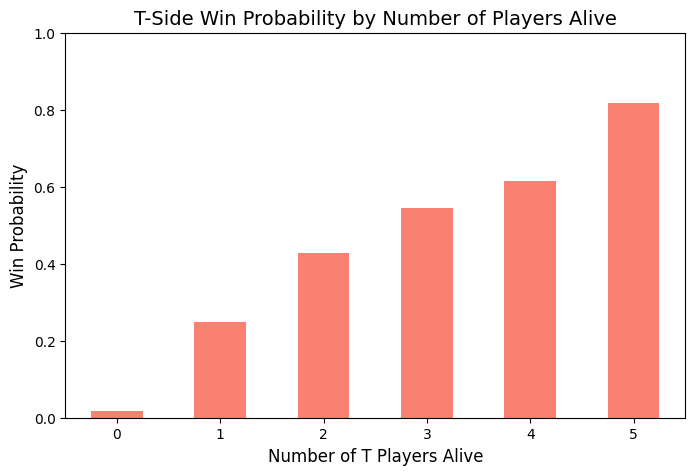

In [ ]:
#filtering dataframe to exclude negative alive count (possible error in data entry)
err_games = df[(df['t_alive'] < 0) | (df['ct_alive'] < 0)]['game_filename'].unique()

df = df[~df['game_filename'].isin(err_games)].copy()
df = df[~df['game_filename'].isin(df[(df['t_alive'] < 0) | (df['ct_alive'] < 0)]['game_filename'])].copy()    #overwriting df with filtered verision of itself

#calculating average win probability by attackers alive count
alive_counts = df.groupby('t_alive')['winner_side'].apply(lambda x: (x=='Terrorist').mean())

plt.figure(figsize=(8,5))
alive_counts.plot(kind='bar', color='salmon')
plt.title('T-Side Win Probability by Number of Players Alive', fontsize=14)
plt.xlabel('Number of T Players Alive', fontsize=12)
plt.ylabel('Win Probability', fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.show()

In [ ]:
#counting number of rounds won by side
map_side_wins = df.groupby(['map', 'winner_side']).size().reset_index(name='wins')
map_rounds = df.groupby('map').size().reset_index(name='rounds')

#calculating winrate for each side
map_winrate = map_side_wins.merge(map_rounds, on='map')
map_winrate['win_rate'] = map_winrate['wins'] / map_winrate['rounds']

map_winrate

,map,winner_side,wins,rounds,win_rate
0,de_cache,CounterTerrorist,449581,944797,0.475849
1,de_cache,Terrorist,495216,944797,0.524151
2,de_cbble,CounterTerrorist,21446,44593,0.480927
3,de_cbble,Terrorist,23147,44593,0.519073
4,de_dust2,CounterTerrorist,68988,148709,0.463913
5,de_dust2,Terrorist,79721,148709,0.536087
6,de_inferno,CounterTerrorist,188100,395383,0.475741
7,de_inferno,Terrorist,207283,395383,0.524259
8,de_mirage,CounterTerrorist,488316,980627,0.497963
9,de_mirage,Terrorist,492304,980627,0.502030


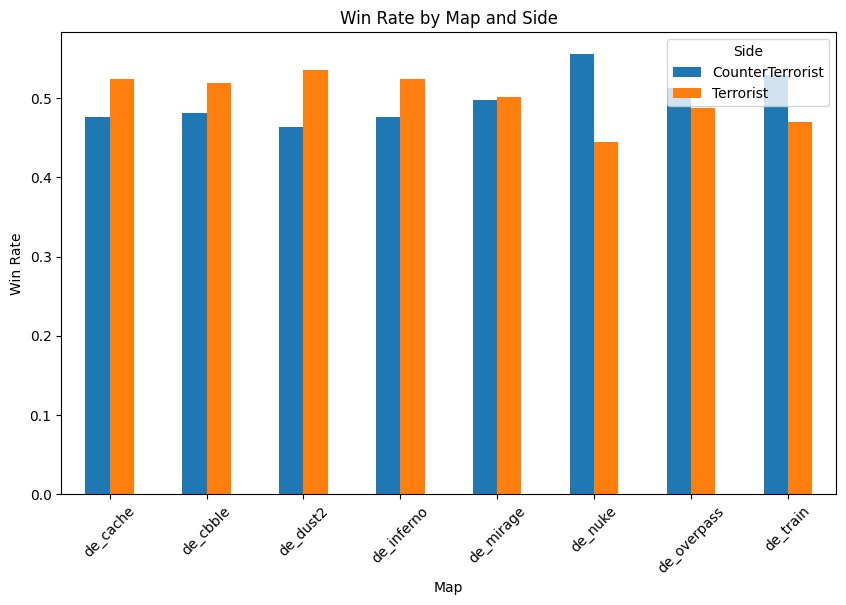

In [ ]:
map_winrate = (
    df.groupby(['map', 'winner_side'])
    .size()
    .reset_index(name='wins')
)
map_winrate['win_rate'] = map_winrate.groupby('map')['wins'].transform(lambda x: x / x.sum())
pivot = map_winrate.pivot(index='map', columns='winner_side', values='win_rate')

pivot.plot(kind='bar', figsize=(10, 6))
plt.title("Win Rate by Map and Side")
plt.ylabel("Win Rate")
plt.xlabel("Map")
plt.xticks(rotation=45)
plt.legend(title="Side")
plt.show()

*   Most maps are slightly T-sided: Cache, Cobble, Dust2, and Inferno all show Terrorists winning ~52–53% of rounds.

*   Nuke is the exception: It’s heavily CT-sided, with CTs winning ~55.5% of rounds.

**In short: Across these maps, Terrorists generally have a small advantage, except for Nuke, Train, and Overpass, which are CT-favored. Mirage is the most balanced.**

In [ ]:
#filtering for bomb defusal maps only
de_maps = df[df['map'].str.startswith('de_') & (df['bomb_planted'] == True)]

#calculating win percentage for Terrorist and grouping by map and bomb site
bomb_site_win = (
    de_maps
    .groupby(['map', 'bomb_site'])['winner_side']
    .apply(lambda x: (x == 'Terrorist').mean())
    .reset_index()
)

bomb_site_win.rename(columns={'winner_side': 't_win_prob'}, inplace=True)
bomb_site_win

,map,bomb_site,t_win_prob
0,de_cache,A,0.738405
1,de_cache,B,0.757636
2,de_cbble,A,0.729420
3,de_cbble,B,0.854374
4,de_dust2,A,0.774955
5,de_dust2,B,0.793306
6,de_inferno,A,0.790339
7,de_inferno,B,0.787958
8,de_mirage,A,0.742854
9,de_mirage,B,0.735563


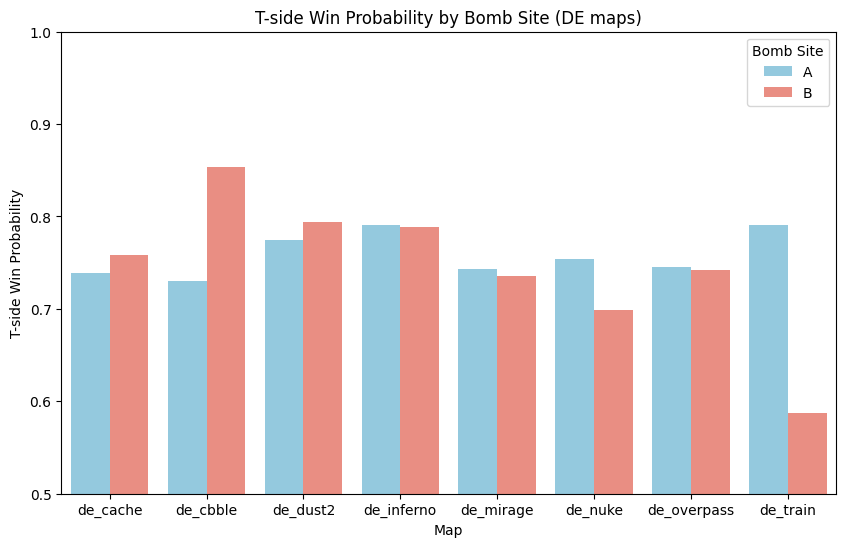

In [ ]:
#creating bar graph of win probabilities by bomb site and map for better interpretation
plt.figure(figsize=(10,6))
sns.barplot(
    data=bomb_site_win,
    x='map',
    y='t_win_prob',
    hue='bomb_site',
    palette={"A": "skyblue", "B": "salmon"}  #mapping bomb sites to specific colors
)
plt.ylabel("T-side Win Probability")
plt.xlabel("Map")
plt.title("T-side Win Probability by Bomb Site (DE maps)")
plt.ylim(0.5, 1.0)  #zooming to show small differences
plt.legend(title="Bomb Site")
plt.show()

*   Overall, Terrorist gain a significant advantage, win rate probability wise, when they plant the bomb.

*   On certain maps, the victory probability signficiantly vary depending on bombsite. For example, on de_train, the chances of winning is **~20%** planting on A then it is on B, indicating strong site-specific effects.

**In short: T-side victories are not uniform; site-specific dynamics cause significant jumps or drops in win probability, reflecting the critical importance of bombsite control and positioning.**

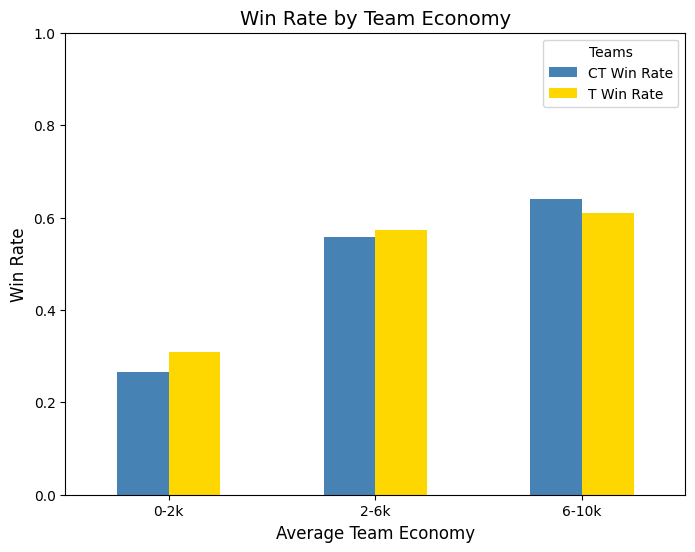

In [ ]:
#calculating win rates based off team economy split into five different bins
bins = [0, 10000, 30000, 50000,70000, 80000]
labels = ['0-2k', '2-6k', '6-10k', '10-14k', '14-16k']

df['ct_eq_bin'] = pd.cut(df['ct_eq_val'], bins=bins, labels=labels)
ct_eq_winrate = df.groupby('ct_eq_bin', observed=True)['winner_side'].apply(lambda x: (x=='CounterTerrorist').mean().round(4))
df['t_eq_bin'] = pd.cut(df['t_eq_val'], bins=bins, labels=labels)
t_eq_winrate = df.groupby('t_eq_bin', observed=True)['winner_side'].apply(lambda x: (x=='Terrorist').mean().round(4))

eq_winrate = pd.concat([ct_eq_winrate, t_eq_winrate], axis=1)
eq_winrate.columns = ['CT Win Rate', 'T Win Rate']

#creating a bar graph for easy win rate visualization
eq_winrate.plot(
    kind='bar',
    figsize=(8,6),
    color=['steelblue', 'gold']
)
plt.title("Win Rate by Team Economy", fontsize=14)
plt.xlabel("Average Team Economy", fontsize=12)
plt.ylabel("Win Rate", fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(title="Teams")
plt.show()

*   Win rates generally increase with higher team economy.

*   Extreme high-econ rounds (14k–16k) are rare, likely due to strategic econ management.

*   Interestingly, T-side slightly outperforms CT in the lowest econ bin (0–2k), hinting they can sometimes win even on weak buys.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

from random import randint

In [ ]:
#selecting relevant features for the ML model (LogisticRegression)
features = ['ct_eq_val', 't_eq_val', 'ct_alive', 't_alive', 'bomb_planted']
X = df[features].copy()
X['bomb_planted'] = X['bomb_planted'].astype(int)
y = df['winner_side'].copy()

#dropping NaNs in feature/target
mask = X.notna().all(axis=1) & y.notna()
X = X[mask]
y = y[mask]

le = LabelEncoder()
y_encoded = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))

#generating random scenarios to simulate real scenarios to test the model
n = 10  # number of scenarios
random_scenarios = pd.DataFrame({
    'ct_eq_val': np.random.randint(0, 16001, size=n),
    't_eq_val': np.random.randint(0, 16001, size=n),
    'ct_alive': np.random.randint(0, 6, size=n),
    't_alive': np.random.randint(0, 6, size=n),
    'bomb_planted': np.random.randint(0, 2, size=n)  # 0 or 1
})

random_scenarios_scaled = scaler.transform(random_scenarios)
pred_probs = model.predict_proba(random_scenarios_scaled)

ct_index = le.transform(['CounterTerrorist'])[0]
t_index = le.transform(['Terrorist'])[0]

random_scenarios['CT_win_prob'] = pred_probs[:, ct_index]
random_scenarios['T_win_prob'] = pred_probs[:, t_index]

random_scenarios

Accuracy: 0.8118716831341416


,ct_eq_val,t_eq_val,ct_alive,t_alive,bomb_planted,CT_win_prob,T_win_prob
0,5990,3466,5,1,0,0.990327,0.009673
1,14961,13089,1,1,0,0.546983,0.453017
2,10088,4021,5,5,1,0.290006,0.709994
3,8754,55,0,1,1,0.184815,0.815185
4,3927,11807,4,3,1,0.446062,0.553938
5,13825,7383,0,4,1,0.005512,0.994488
6,10587,5448,4,0,0,0.992234,0.007766
7,9729,7020,0,2,1,0.049507,0.950493
8,14768,14900,5,5,1,0.237584,0.762416
9,3214,11283,2,3,1,0.080450,0.919550


*   The model predicts round outcomes with ~81% accuracy using features like team economy, players alive, and bomb planted status.

*   Rounds heavily favor teams with more players alive and higher economy, confirming intuitive gameplay assumptions.

*   Bomb status has a measurable impact: even when teams are evenly matched in economy and alive count, planting the bomb shifts the predicted win probability toward the planter’s side.

**The model allows exploring “what-if” scenarios: for instance, how much a first kill or slightly higher economy swings the probability of winning, providing a data-backed perspective on strategic advantages.**

In [ ]:
#identifying the effect size and direction of each feature on the probability of the Terrorists winning from the LogisticRegression model
feature_importance = pd.DataFrame({
    'feature': features,
    'coefficient': model.coef_[0]
}).sort_values(by='coefficient', ascending=False)

feature_importance

,feature,coefficient
3,t_alive,1.733353
1,t_eq_val,0.387201
4,bomb_planted,0.322995
0,ct_eq_val,-0.474545
2,ct_alive,-1.594081


##**Key Drivers of Win Probability**
Terrorists Alive (OR): $e^{1.733} \approx 5.66$
Counter Terrorists Alive (OR): $e^{-0.475} \approx 0.62$

*   **Manpower is king**: The number of players alive has the greatest influence on round outcomes. Each additional Terrorist alive **increases win odds by ~5.6x**, while each extra CT alive cuts them to ~0.62x. Survival and trading efficiency outweigh both economy and objective play.

Terrorist Economy (OR): $e^{0.387} \approx 1.47$

*   **Economy matters**, but less than survival: Higher equipment value boosts win chances (T side +1.47x), but firepower alone cannot offset manpower disadvantages. Teams with rifles and utility still lose if they are outnumbered.

Bomb Planted (OR): $e^{0.323} \approx 1.38$

*   **Bomb plants help but don’t guarantee success**: Planting **improves Terrorist odds by ~1.4x**, yet its effect is dwarfed by alive counts. A planted bomb with fewer players alive remains a losing scenario more often than not.

In [ ]:
#selecting additional features to train LogisticRegression classifier
features_numeric = ['ct_eq_val', 't_eq_val', 'ct_alive', 't_alive', 'bomb_planted', 'round_seconds']
features_categorical = ['map', 'bomb_site']

#preparing features by dropping NaNs and one-hot encoding categorical variables
mask = df[features_numeric + features_categorical + ['winner_side']].notna().all(axis=1)
df_model = df[mask].copy()
df_model = pd.get_dummies(df_model, columns=features_categorical, drop_first=True)

X = df_model[features_numeric + [col for col in df_model.columns if col.startswith('map_') or col.startswith('bomb_site_')]]
y = LabelEncoder().fit_transform(df_model['winner_side'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#scaling numeric features for the model
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[features_numeric] = scaler.fit_transform(X_train[features_numeric])
X_test_scaled[features_numeric] = scaler.transform(X_test[features_numeric])

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr), "\n")
print(classification_report(y_test, y_pred_lr, target_names=LabelEncoder().fit(df_model['winner_side']).classes_))

Logistic Regression Accuracy: 0.8830304718638837 

                  precision    recall  f1-score   support

CounterTerrorist       0.80      0.71      0.75     23271
       Terrorist       0.91      0.94      0.92     70061

        accuracy                           0.88     93332
       macro avg       0.85      0.83      0.84     93332
    weighted avg       0.88      0.88      0.88     93332



By incorporating additional features such as round seconds, map, and bomb site, the model’s accuracy improved to **~88%**, representing a **~7% increase** in predictive performance.

In [ ]:
#identifying the effect size and direction of each feature on the probability of the Terrorists winning from the LogisticRegression model
feature_importance = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'coefficient': lr_model.coef_[0]
}).sort_values(by='coefficient', ascending=False)

feature_importance.sort_values(by='feature', inplace=True)
feature_importance

,feature,coefficient
4,bomb_planted,0.000000
13,bomb_site_B,0.081038
2,ct_alive,-1.685280
0,ct_eq_val,-0.452377
6,map_de_cbble,0.089821
7,map_de_dust2,0.119874
8,map_de_inferno,0.169836
9,map_de_mirage,0.018405
10,map_de_nuke,-0.024054
11,map_de_overpass,-0.012779


##**Key Drivers of Win Probability (Logistic Regression w/ Additional Features)**
Terrorists Alive (OR): $e^{2.277} \approx 9.75$

Counter Terrorists Alive (OR): $e^{-1.685} \approx 0.19$

*   **Manpower dominates round outcomes:** The number of players alive has the largest influence. Each extra Terrorist alive increases win odds by ~9.8x, while each extra CT alive reduces them to ~0.2x. Survival and trading efficiency outweigh economy, bomb plants, and map factors.

Terrorist Economy (OR): $e^{0.355} \approx 1.42$
CT Economy (OR): $e^{-0.452} \approx 0.64$

*   **Economy matters, but less than manpower:** Higher equipment value increases win probability modestly. Teams with strong firepower can still lose if outnumbered, emphasizing that rifles and utility can’t fully offset alive disadvantages.

Bomb Planted (OR): $e^{0.000} \approx 1.00$

*   **Effect is context-dependent:** The coefficient for bomb_planted is zero, not because it’s unimportant, but because its influence is captured by other correlated features like alive counts and round timing. Planting the bomb still matters in practice, especially when alive counts are favorable.

Round Seconds (OR): $e^{0.078} \approx 1.08$

*   **Timing within rounds has a small effect:** Later kills slightly shift round win probabilities, reinforcing that early advantages in manpower and economy are more decisive.

<br>

Map & Bomb Site Effects:

*   Maps such as Inferno ($e^{0.170} \approx 1.19$), Dust2 ($e^{0.120} \approx 1.13$), and Cobble ($e^{0.090} \approx 1.09$) subtly favor Terrorist wins, while maps like Train ($e^{-0.038} \approx 0.96$) and Nuke ($e^{-0.024} \approx 0.98$) slightly favor CTs.

*   Bomb site B ($e^{0.081} \approx 1.08$) provides a minor boost for Terrorists, though its effect is dwarfed by alive counts and economy.

In [ ]:
#running Random Forest to compare accuracy with Logistic Regression and check feature importance (relative)
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\n",classification_report(y_test, y_pred_rf, target_names=LabelEncoder().fit(df_model['winner_side']).classes_))

Random Forest Accuracy: 0.8855590794154202

                   precision    recall  f1-score   support

CounterTerrorist       0.80      0.72      0.76     23271
       Terrorist       0.91      0.94      0.92     70061

        accuracy                           0.89     93332
       macro avg       0.85      0.83      0.84     93332
    weighted avg       0.88      0.89      0.88     93332



In [ ]:
#ranking feature importance based off the Random Forest clasifier
feature_importance_rf = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'importance': rf_model.feature_importances_
}).sort_values(by='importance', ascending=False)

feature_importance_rf.sort_values(by='importance', ascending=False, inplace=True)
feature_importance_rf

,feature,importance
3,t_alive,0.319558
2,ct_alive,0.187144
5,round_seconds,0.166360
0,ct_eq_val,0.153431
1,t_eq_val,0.151741
13,bomb_site_B,0.005917
9,map_de_mirage,0.004448
8,map_de_inferno,0.002802
11,map_de_overpass,0.002662
7,map_de_dust2,0.002170


**Feature Importance Insights:**

*   **Manpower dominates:** Both models show alive players (t_alive, ct_alive) as the strongest predictors of winning.

*   Bomb planted is neutral: Direct effect is minimal; impact is mostly indirect via player counts and economy.

*   Economy and timing matter: Equipment values and round_seconds influence outcomes but are secondary to manpower.

Fun insight: Even on a favorable bomb site, being outnumbered sharply reduces win probability.

In [ ]:
#sorting feature importance based off the LR and RF models
feature_importance['abs_coef'] = feature_importance['coefficient'].abs()
feature_importance_sorted = feature_importance.sort_values(by='abs_coef', ascending=False).reset_index(drop=True)

feature_importance_rf_sorted = feature_importance_rf.sort_values(by='importance', ascending=False).reset_index(drop=True)

#creating dataframe to showcase both side-by-side
comparison_df = pd.DataFrame({
    'LR_feature': feature_importance_sorted['feature'],
    'LR_abs_coef': feature_importance_sorted['coefficient'],
    'RF_feature': feature_importance_rf_sorted['feature'],
    'RF_importance': feature_importance_rf_sorted['importance']
})

comparison_df

,LR_feature,LR_abs_coef,RF_feature,RF_importance
0,t_alive,2.276802,t_alive,0.319558
1,ct_alive,-1.685280,ct_alive,0.187144
2,ct_eq_val,-0.452377,round_seconds,0.166360
3,t_eq_val,0.354501,ct_eq_val,0.153431
4,map_de_inferno,0.169836,t_eq_val,0.151741
5,map_de_dust2,0.119874,bomb_site_B,0.005917
6,map_de_cbble,0.089821,map_de_mirage,0.004448
7,bomb_site_B,0.081038,map_de_inferno,0.002802
8,round_seconds,0.077774,map_de_overpass,0.002662
9,map_de_train,-0.038023,map_de_dust2,0.002170


**🔑 Insights from Comparison**

*   Strong agreement on manpower: Both models clearly agree that players alive (T/CT) dominate round outcomes. Terrorists alive is the top feature in both, followed by CTs alive.

Differences in secondary features:

*   LR emphasizes economy (ct_eq_val, t_eq_val) more strongly, assigning them higher coefficients.

*   RF ranks round_seconds much higher than LR, suggesting timing plays a bigger role in its decision splits than LR coefficients reveal.

*   Maps & sites have minimal impact: Both models assign very low importance to map choice and bomb site, reinforcing that the round outcome is more about team state (alive, economy, time) than environment.

*   Bomb planted effect muted: Both models downplay bomb_planted, with LR shrinking its coefficient to ~0 (likely due to collinearity with alive counts + time), while RF outright assigns it zero splits. This suggests planting itself isn’t predictive unless combined with player advantage.

**⚖️ Why this matters**

*   LR gives directional + interpretable effects (who benefits and by how much).

*   RF gives relative importance and can capture nonlinear/time interactions that LR may understate.

Seeing both side by side gives confidence that alive counts are universally dominant, while showing how models differ on subtler factors like time vs. economy.